# SMILE DETECTOR USING OpenCV :

## IMPORTING THE DATA :

In [74]:
import matplotlib.pyplot as plt
import cv2


""" These XML files contains haar-like features to detect facial properties. 
    The cascade is a series of filters that will apply one after 
    the other to detect a face through its features.
"""


cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

cascade_smile = cv2.CascadeClassifier('haarcascade_smile.xml')

#THESE ARE THE CASCADES FOR THE FACE AND SMILES

## SMILE DETECTOR ALGORITHM :

In [75]:
def detection(grayscale, img):
    
    face = cascade_face.detectMultiScale(grayscale, 1.3, 5)
    # detectMultiScale function is to actually get the coordinates
    
    for (x_face, y_face, w_face, h_face) in face:
        
        cv2.rectangle(img, (x_face, y_face), (x_face+w_face, y_face+h_face), (0,255,0), 2)
        # x & y are coordinates of the upper left corner and w, h are the height and width
        #cv2.rectangle is for displaying a bouncing box when face is detected
        
        # FOR MODEL, TO WORK ON :
        ri_grayscale = grayscale[y_face:y_face+h_face, x_face:x_face+w_face]
        
        # FOR US, TO VIEW THE ORIGINAL IMAGE WITH BOUNCING BOX : 
        ri_color = img[y_face:y_face+h_face, x_face:x_face+w_face] 
        
        # FOR SMILE DETECTION :
        smile = cascade_smile.detectMultiScale(ri_grayscale, 1.7, 20)
        # The size of the image is reduced to 1.7x
        # Minimum neighbors is taken as 20
        
        for (x_smile, y_smile, w_smile, h_smile) in smile: 
            
            cv2.rectangle(ri_color,(x_smile, y_smile),(x_smile+w_smile, y_smile+h_smile), (220,20,60), 2)
            # For bouncing box
    
    return img 

## DETECTING THE OUTPUT :

In [76]:
def output(img):
    img = cv2.imread(img) 
    #converting input image to grayscale :
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    final = detection(grayscale, img) 
    final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB) # matplotlib always displays in RGB format
    
    #Visualizing the output :
    plt.figure(figsize=(10, 10))
    plt.imshow(final)
    plt.axis('off')
    plt.show()

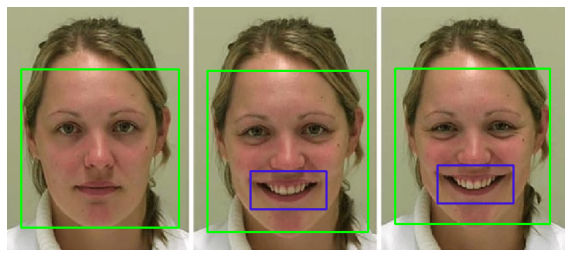

In [77]:
output('all5.jpg')

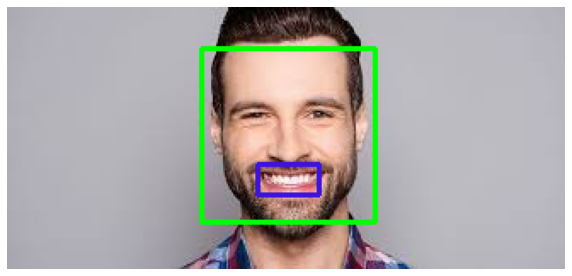

In [78]:
output('image3.jpg')

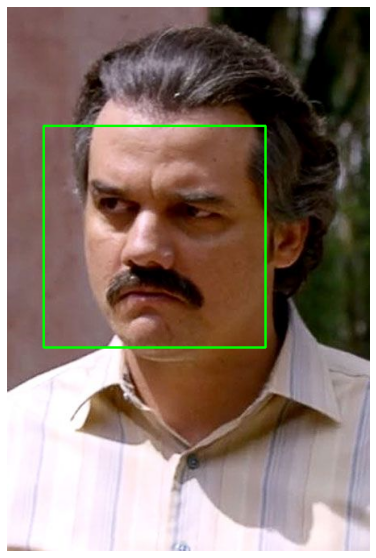

In [79]:
output('normal1.jpg')

## HERE WE CAN CLEARLY SEE THAT THE BOUNCING BOX APPEARS AROUND THE 

## MOUTH ONLY WHEN THE PERSON SMILES OR ELSE ONLY THE FACE IS DETECTED.